In [294]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import * 
import scipy.optimize as optimize
import sympy as sp

verify kinetic of MD-state, compare the displacement of track with theory

experiment data as follow, track displacement vs. P

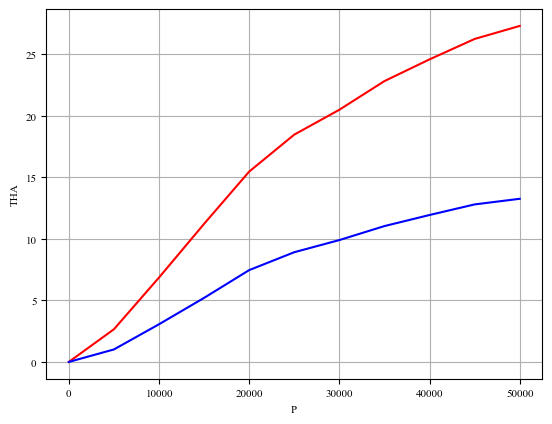

In [295]:
P_ex = np.array([0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0])*1000

angle1_ex = np.array([9.95,16.61,27.54,34.94,47.19,53.78,59.33,64.96,67.04,72.83,77.03])-9.95
angle2_ex = np.array([10.00,16.93,25.80,37.17,47.08,54.89,60.93,65.36,71.26,73.49,76.34])-10.00
angle3_ex = np.array([10,15.65,26.33,39.20,47.83,55.21,58.28,65.11,69.92,73.93,74.56])-10
angle_ex = (angle1_ex + angle2_ex + angle3_ex)/3

dis1_ex = np.array([-9.89,-8.81,-6.60,-5.22,-2.42,-1.11,0.02,1.18,1.58,2.93,3.69])+9.89
dis2_ex = np.array([-9.33,-8.14,-6.40,-4.02,-1.88,-0.36,0.96,1.80,3.08,3.50,4.06])+9.33
dis3_ex = np.array([-9.89,-9.12,-6.93,-4.26,-2.43,-0.90,-0.39,1.02,2.04,2.85,2.90])+9.89
dis_ex = (dis1_ex + dis2_ex + dis3_ex)/3

plt.plot(P_ex,angle_ex/180*pi*23.7,'r')
plt.plot(P_ex,dis_ex,'b')

plt.xlabel('P')
plt.ylabel('THA')
plt.grid()
plt.show()

theorical data, new model for p vs angle, but first need to consider angle vs. displacement and volume for OT-SPA

In [296]:
u, phi = [], []
angle = 0
while angle <= np.pi/3:
    phi.append(angle)
    angle += np.pi/300

AB, h0 = 18.84, 32

for i in range(0, len(phi)):
    cur = h0 - np.sqrt(h0**2 + AB**2 - 4 * AB**2 * (np.sin(np.pi/6 + phi[i]/2))**2)
    u.append(cur)
    phi[i] *= (180/np.pi)

In [297]:
MP, h0 = 18.84,32.45#16.54, 32.45 #14.6, 25.29 #18.84,32 # 18.84,35.9
phi, V = [], []
angle = 0

while angle <= np.pi/3:
    phi.append(angle)
    angle += np.pi/300

for i in range(0, len(phi)):
    u1 = h0 - np.sqrt(h0**2 + MP**2 - 4 * MP**2 * (np.sin(np.pi/6 + phi[i]/2))**2)
    MQh = np.array([MP*(np.cos(phi[i] + np.pi/3) - 1), MP*np.sin(phi[i] + np.pi/3), h0-u1])
    MRh = np.array([MP*(np.cos(phi[i] + 2*np.pi/3) - 1), MP*np.sin(phi[i] + 2*np.pi/3), h0-u1])
    MGh = np.array([-MP, 0, (h0-u1)/2])
    MPh = np.array([MP*(np.cos(np.pi/3) - 1), MP*np.sin(np.pi/3), 0])

    V1 = np.linalg.norm(np.dot(np.cross(MQh,MRh), MGh))
    V2 = np.linalg.norm(np.dot(np.cross(MPh,MRh), MGh))
    V3 = np.sqrt(3)/2 * (h0 - u1) * MP**2
    print(V3/2)
    V.append((V1 + V2 + V3))
    phi[i] *= 180/np.pi


V_bihou = -18.84*36.95*-np.cos(104.48)*6*1.5
V = np.array(V) + V_bihou

4987.433683960498
4972.117905058454
4956.663739274137
4941.071590833232
4925.34186732307
4909.47497967138
4893.471342124637
4877.3313722259845
4861.055490792733
4844.644121893406
4828.097692824346
4811.416634085828
4794.601379357715
4777.6523654746
4760.570032400446
4743.354823202695
4726.007184025838
4708.527564064421
4690.916415535481
4673.174193650382
4655.301356586029
4637.298365455468
4619.165684277808
4600.903779947477
4582.513122202774
4563.994183593695
4545.347439449015
4526.573367842577
4507.672449558793
4488.6451680573045
4469.492009436772
4450.213462397775
4430.81001820478
4411.282170647138
4391.630415999082
4371.855252978686
4351.957182705727
4331.936708658437
4311.794336629073
4291.530574678269
4271.145933088119
4250.640924313942
4230.016062934661
4209.271865601752
4188.408850986694
4167.427539726856
4146.3284543697555
4125.11211931561
4103.7790607581155
4082.329806623365
4060.7648865068227
4039.084831608265
4017.2901746646057
3995.381449880476
3973.3591928565
3951.2239405

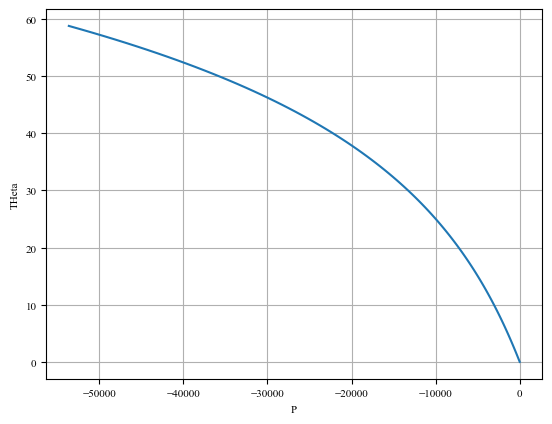

In [298]:
phi, P_r, P2, P3 = [], [], [], []
angle = 0
ka, kb = 0.14639491747585104, 1283.9285714285716
while angle <= np.pi/3:
    phi.append(angle)
    angle += np.pi/300

for i in range(0, len(V) - 1):
    dv = (V[i+1] - V[i])*1e-9
    dph = phi[i+1] - phi[i]
    du = (u[i+1] - u[i])/1000
    cur2 = ka*phi[i] + kb*(u[i]/1000)*du/dph
    #cur2 = ka*phi[i] + 122.5979*np.power((u[i]/1000),0.5020609)*du/dph # non linear spring
    P3.append(cur2/(dv/dph))

plt.plot(np.array(P3),np.array(phi)[0:len(phi)-1]*180/np.pi)
plt.xlabel('P')
plt.ylabel('THeta')
plt.grid()
plt.show()


Put above together,angle and dis,angle's difference is big, however, the dis of track seems ok.

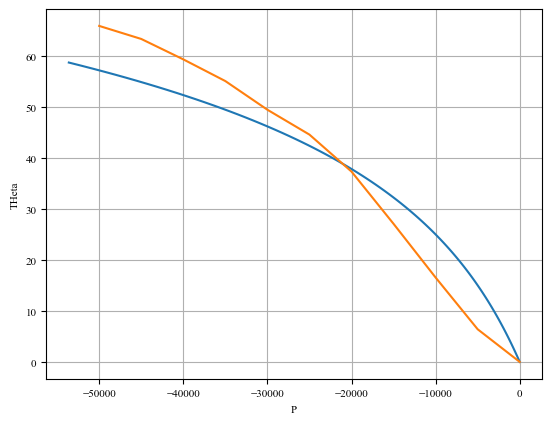

In [299]:
r = 23.7 # min MAE->0.23

plt.plot(np.array(P3),np.array(phi)[0:len(phi)-1]*180/np.pi)
plt.plot(-P_ex,angle_ex)
plt.xlabel('P')
plt.ylabel('THeta')
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

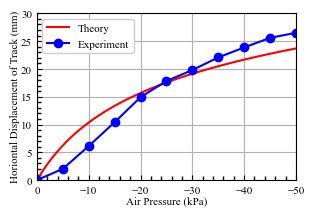

In [300]:
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()
plt.figure(figsize=(8.49/2.54, 5.5/2.54))
#plt.plot(P_t, angle_t*pi/180*r,'r',label = 'Theory')
plt.plot(np.array(P3)/1000,np.array(phi)[0:len(phi)-1]*r,'r',label = 'Theory')
plt.plot(-P_ex/1000,2*dis_ex,'o-b',label = 'Experiment')
plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
# plt.tick_params(labelsize=8)

plt.legend(title='', loc='upper left', framealpha=1)
plt.rcParams.update({'font.size':8})
plt.xlabel('Air Pressure (kPa)',labelpad=0.5)
plt.ylabel('Horiontal Displacement of Track (mm)',labelpad=0.5)
plt.grid()
plt.ylim(0,30)
plt.xlim(0, -50)

plt.savefig('Track dis-P-verify.svg',format = "svg", dpi= 300)

plt.show()

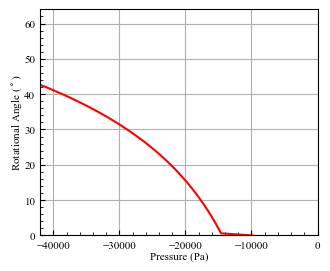

In [301]:
phi,Pf2 = [],[]
angle,T = 0, 0 #0,0
ka,ka1, kb = 0.14639491747585104,0.41054760144392444, 1283.9285714285716
while angle <= np.pi/3:
    phi.append(angle)
    angle += np.pi/300

#Torque2=200/100*19/2/1000
Torque2=2*(4.21+4.22)/2*19/2/1000

Pini2 = 1

for i in range(0, len(V) - 1):
    dv = (V[i+1] - V[i])*1e-9
    dph = phi[i+1] - phi[i]
    du = (u[i+1] - u[i])/1000

    cur2 = 0
    if phi[i]>0: # state 0

        #cur2 = (ka*(phi[i]) + 122.5979*np.power(((u[i])/1000),0.5020609)*du/dph) + Torque2
        cur2 = ka*phi[i] + kb*(u[i]/1000)*du/dph + Torque2

        if Pini2 == 1:
            Pini2 = cur2/(dv/dph)
    else:
        cur2 = 0

    Pf2.append(cur2/(dv/dph))


theta = [-4.47095718e+06,  4.19055413e+05, -1.91764462e+05,  3.58221924e+02]
reP2 = theta[0]*np.power(Torque2,3)+theta[1]*np.power(Torque2,2)+theta[2]*Torque2+theta[3]


plt.figure(figsize=(8.49/2.54,7/2.54))
plt.minorticks_on()
plt.tick_params(axis='x',direction='in',which='both',bottom=True,top=False,labelbottom=True)
plt.tick_params(axis='y',direction='in',which='both',left=True,right=False,labelbottom=True)
plt.tick_params(labelsize=8)
 # Torquex simulation
#plt.scatter(P11/1000,angle11,color='blue')
plt.plot((np.array(Pf2)+reP2-Pini2),np.array(phi)[0:len(phi)-1]*180/np.pi,color='red')

plt.ylabel('Rotational Angle ($^\circ$)', fontsize = 8, labelpad= 0.5)
plt.xlabel('Pressure (Pa)',fontsize = 8, labelpad= 0.5)
plt.grid()
plt.ylim(0,64)
plt.xlim(-42000,0)
plt.tight_layout()
#plt.savefig("RALfig/2-5-8Nload.svg",dpi=300)
plt.show()

displacement of tank,experimental data

In [302]:
tank_P_ex = np.array([20,25,30,35,40])*1000

tank_dis_ex = np.array([(3.4+3.45+3.45+3.7+3.65)/5, (5.3+5.45+5.5+5.4+4.9)/5, (6.4+7.15+6.45+6.8+6.35)/5,
(8.68+7.65+8.4+7.7+8.3)/5, (8.15+8.2+8.25+8.4+8.15)/5]) # load = 0g



In [303]:
tank_dis_th = 3*2*r*np.array(phi)[0:len(phi)-1]/10

<Figure size 640x480 with 0 Axes>

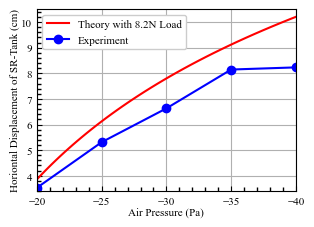

In [304]:
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()

plt.figure(figsize=(8.49/2.54,6.0/2.54))
plt.plot((np.array(Pf2)+reP2-Pini2)/1000, tank_dis_th,'r',label = 'Theory with 8.2N Load')
#plt.plot(-np.array(P3), tank_dis_th,'g',label = 'theory-noload')

plt.plot(-tank_P_ex/1000,tank_dis_ex,'o-b',label = 'Experiment')


plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})
plt.legend(title='', loc='upper left', framealpha=1)
plt.xlabel('Air Pressure (Pa)',labelpad=0.5)
plt.ylabel('Horiontal Displacement of SR-Tank (cm)',labelpad=0.5)
plt.grid()
plt.autoscale(tight = True)

# plt.grid(linestyle='--')
plt.ylim(3.4,10.5)
plt.xlim(-20, -40)
plt.savefig('Tank dis-P-verify.svg',format = "svg",dpi=300)

plt.show()

Car kinetic verify, including turing angle and radius in 3 cycles, without load, verify

experimental data of turing angle and radius in 3 cycles, without load

In [305]:
# turing angle
P1_ex = np.array([25,30,35,40])*1000

turing_angle_ex = np.array([(5.7509+6.1176+6.2746+6.6507+6.2823)/5, (9.5207+ 10.0542+8.9791+8.4335+9.5371)/5,
(11.6489+12.2345+12.4613+11.4276+ 12.6046)/5, (13.2829+13.7613+13.5656+12.9839+13.4273)/5])
print(turing_angle_ex)

turing_radius_ex = np.array([ (36.3993+34.8109+35.1265+34.7021+34.9138)/5, (34.3450+33.6550+36.0608+34.9045+34.4092)/5,
(34.9741+35.8409+34.7223+34.1635+35.6250)/5, (33.7201+34.1091+36.0720+36.1742+35.1294)/5])


[ 6.21522  9.30492 12.07538 13.4042 ]


theortical data, use dis of track as arc length, the turing radius is the length from the center of track(the turing center) to the outside of the other track, where the front wheel set. 
turing angle is simply arc length/turing radius



In [306]:
cycle = 3

turing_radius_th = np.sqrt(27.25**2+10.256**2)
print(turing_radius_th)

arc_length = np.array(phi)[0:len(phi)-1]*(r/10)*cycle*2
print(arc_length)

turing_angle_th = arc_length/(1*turing_radius_th)*(180/pi)

print(turing_angle_th)



29.116112996071436
[ 0.          0.14891149  0.29782298  0.44673448  0.59564597  0.74455746
  0.89346895  1.04238044  1.19129193  1.34020343  1.48911492  1.63802641
  1.7869379   1.93584939  2.08476088  2.23367238  2.38258387  2.53149536
  2.68040685  2.82931834  2.97822984  3.12714133  3.27605282  3.42496431
  3.5738758   3.72278729  3.87169879  4.02061028  4.16952177  4.31843326
  4.46734475  4.61625625  4.76516774  4.91407923  5.06299072  5.21190221
  5.3608137   5.5097252   5.65863669  5.80754818  5.95645967  6.10537116
  6.25428265  6.40319415  6.55210564  6.70101713  6.84992862  6.99884011
  7.14775161  7.2966631   7.44557459  7.59448608  7.74339757  7.89230906
  8.04122056  8.19013205  8.33904354  8.48795503  8.63686652  8.78577802
  8.93468951  9.083601    9.23251249  9.38142398  9.53033547  9.67924697
  9.82815846  9.97706995 10.12598144 10.27489293 10.42380442 10.57271592
 10.72162741 10.8705389  11.01945039 11.16836188 11.31727338 11.46618487
 11.61509636 11.76400785 11.9129

put it together, both diff are pretty big, because of effct of pitch radius, acr length, and fiction from internal, fiction from ground 

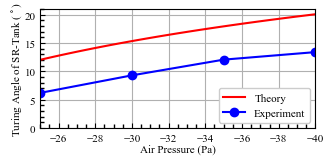

In [307]:
plt.figure(figsize=(8.49/2.54, 4.5/2.54))


plt.plot((np.array(Pf2)+reP2-Pini2)/1000, turing_angle_th,'r',label = 'Theory')
plt.plot(-P1_ex/1000,turing_angle_ex,'o-b',label = 'Experiment')
plt.legend(title='', loc='lower right', framealpha=1)
plt.xlabel('Air Pressure (Pa)',labelpad=0.5)
plt.ylabel('Turing Angle of SR-Tank ($^\circ$)',labelpad=0.5)
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()
plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})



plt.grid()
plt.xlim(-25, -40)
plt.ylim(0, 21.0)

plt.savefig('Turing Angle-P-verify.svg',format = "svg",dpi=300)

plt.show()

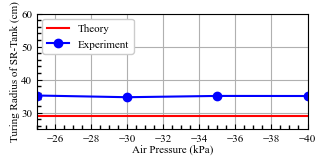

In [308]:
turing_radius_th_arr = np.ones(4)*turing_radius_th

plt.figure(figsize=(8.49/2.54, 4.3/2.54))

plt.plot(-P1_ex/1000, turing_radius_th_arr,'r',label = 'Theory')
plt.plot(-P1_ex/1000,turing_radius_ex,'o-b',label = 'Experiment')
plt.legend(title='', loc='upper left', framealpha=1)
plt.xlabel('Air Pressure (kPa)',labelpad=0.5)
plt.ylabel('Turing Radius of SR-Tank (cm)',labelpad=0.5)
plt.grid()
plt.rcParams["font.family"] = "Times New Roman"

plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})

plt.xlim(-25, -40)
plt.ylim(25, 60)


plt.tight_layout()
# plt.autoscale(tight='True')
plt.savefig('Turing Radius-P-verify.svg',format = "svg",dpi=300)

plt.show()

gamma parameter fitting, gamma is the parameter determined by both the ground fiction and load when SR-Tank is turning around. We use first two experiment data to fit gamma, then use rest three experiment data to verify.

In [309]:
#gamma is :

print(36/turing_radius_th)

1.2364287775932656


In [310]:
def fitting_goodness(y, y_fit):
    mean = np.mean(y)  # 1.y mean
    ss_tot = np.sum((y - mean) ** 2)  # 2.total sum of squares
    ss_res = np.sum((y - y_fit) ** 2)  # 3.residual sum of squares
    r_squared = 1 - (ss_res / ss_tot)  # 4.r squared
    return r_squared

In [311]:
turing_angle_ex1 = np.array([(5.7509+6.1176)/2, (9.5207+10.0542)/2,(11.6489+12.2345)/2, (13.2829+13.7613)/2])/180*pi
OA = 27.25
l = 10.256
dis1_ex1 = np.array([-1.11,0.02,1.18,1.58])+9.89
dis2_ex1 = np.array([-0.36,0.96,1.80,3.08])+9.33
dis_ex1 = ((dis1_ex1+dis2_ex1)/2)*6/10
print(dis_ex1)

[5.325 6.06  6.66  7.164]


-0.3455182526008729
-0.2729623420643834


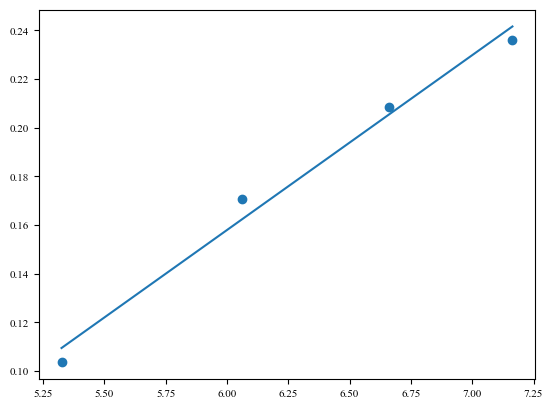

In [312]:

def target_func(x, gamma,b):
    return x/np.sqrt((gamma*OA)**2+l**2)+b

para, cov = optimize.curve_fit(target_func, dis_ex1, turing_angle_ex1)
a=para[0]
b=para[1]
print(a)
print(b)


plt.scatter(dis_ex1,turing_angle_ex1)
#plt.plot(dis_ex1/(1.1834129750393416*turing_radius_th))
plt.plot(dis_ex1,dis_ex1/np.sqrt((a*OA)**2+l**2)+b)


In [313]:
cycle = 3

turing_radius_th = np.sqrt(27.25**2+10.256**2)
print(turing_radius_th)

arc_length_f = np.array(phi)[0:len(phi)-1]*(r/10)*cycle*2
print(arc_length_f)

turing_angle_th_f = arc_length_f/(1.2020835337712303*turing_radius_th)*(180/np.pi)
#turing_angle_th_f = arc_length_f/(np.sqrt((a*OA)**2+l**2)+b)*(180/np.pi)

print(turing_angle_th_f)

29.116112996071436
[ 0.          0.14891149  0.29782298  0.44673448  0.59564597  0.74455746
  0.89346895  1.04238044  1.19129193  1.34020343  1.48911492  1.63802641
  1.7869379   1.93584939  2.08476088  2.23367238  2.38258387  2.53149536
  2.68040685  2.82931834  2.97822984  3.12714133  3.27605282  3.42496431
  3.5738758   3.72278729  3.87169879  4.02061028  4.16952177  4.31843326
  4.46734475  4.61625625  4.76516774  4.91407923  5.06299072  5.21190221
  5.3608137   5.5097252   5.65863669  5.80754818  5.95645967  6.10537116
  6.25428265  6.40319415  6.55210564  6.70101713  6.84992862  6.99884011
  7.14775161  7.2966631   7.44557459  7.59448608  7.74339757  7.89230906
  8.04122056  8.19013205  8.33904354  8.48795503  8.63686652  8.78577802
  8.93468951  9.083601    9.23251249  9.38142398  9.53033547  9.67924697
  9.82815846  9.97706995 10.12598144 10.27489293 10.42380442 10.57271592
 10.72162741 10.8705389  11.01945039 11.16836188 11.31727338 11.46618487
 11.61509636 11.76400785 11.9129

In [314]:
turing_angle_ex_f = np.array([(6.2746+6.6507+6.2823)/3, (8.9791+8.4335+9.5371)/3,
(12.4613+11.4276+ 12.6046)/3, (13.5656+12.9839+13.4273)/3])

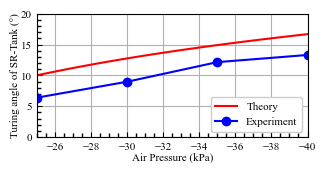

In [315]:
plt.figure(figsize=(8.49/2.54,4.5/2.54))

plt.plot((np.array(Pf2)+reP2-Pini2)/1000, turing_angle_th_f,'r',label = 'Theory')
plt.plot(-P1_ex/1000,turing_angle_ex_f,'o-b',label = 'Experiment')
plt.legend(title='', loc='lower right', framealpha=1)
plt.xlabel('Air Pressure (kPa)',labelpad=0.5)
plt.ylabel('Turing angle of SR-Tank (°)',labelpad=0.5)
plt.grid()
plt.rcParams["font.family"] = "Times New Roman"

plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})
plt.xlim(-25, -40)
plt.ylim(0, 20)
plt.tight_layout()
plt.savefig('Turing angle-P-verify-with_Gamma.svg',format = "svg",dpi=300)


plt.show()